# Importando Dataset | Download das imagens

## Intergrantes do Grupo:
4SIA<br>
Andre Keigo Nishioka RM:85171<br>
Gabriel Rodrigues Ramos da Silva RM:84895

In [ ]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...
downloadingimages_04.tar.gz...
downloadingimages_05.tar.gz...
downloadingimages_06.tar.gz...
downloadingimages_07.tar.gz...
downloadingimages_08.tar.gz...
downloadingimages_09.tar.gz...
downloadingimages_10.tar.gz...
downloadingimages_11.tar.gz...
downloadingimages_12.tar.gz...
Download complete. Please check the checksums


In [ ]:
import tarfile
import os

# Diretório de origem
diretorio_origem = "/content"

# Diretório de destino para extração
diretorio_destino = "/content/images/"

# Crie o diretório de destino se ele não existir
os.makedirs(diretorio_destino, exist_ok=True)

# Crie um loop para percorrer cada arquivo no diretório de origem
for arquivo in os.listdir(diretorio_origem):
    # Verifique se o arquivo é um .tar.gz
    if arquivo.endswith(".tar.gz"):
        # Caminho completo para o arquivo
        caminho_arquivo = os.path.join(diretorio_origem, arquivo)

        # Extraia o conteúdo do arquivo .tar.gz para o diretório de destino
        with tarfile.open(caminho_arquivo, 'r:gz') as tar:
            tar.extractall(diretorio_destino)

        print(f"Arquivo {arquivo} extraído para {diretorio_destino}")

In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from skimage.util import montage as montage2d
from skimage.io import imread
!wget https://raw.githubusercontent.com/Kazetto/Global-Solution-2023/main/Dataset/Data_Entry_2017_v2020.csv

--2023-11-23 14:14:52--  https://raw.githubusercontent.com/Kazetto/Global-Solution-2023/main/Dataset/Data_Entry_2017_v2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9003499 (8.6M) [text/plain]
Saving to: ‘Data_Entry_2017_v2020.csv’

Data_Entry_2017_v20 100%[===================>]   8.59M  --.-KB/s    in 0.1s    

2023-11-23 14:14:52 (77.8 MB/s) - ‘Data_Entry_2017_v2020.csv’ saved [9003499/9003499]



In [2]:
all_xray_df = pd.read_csv('/content/Data_Entry_2017_v2020.csv')
all_image_paths = {os.path.basename(x): x for x in
                   glob(os.path.join('images', 'images', '*.png'))}
print('Scans found:', len(all_image_paths), ', Total Headers', all_xray_df.shape[0])
all_xray_df['path'] = all_xray_df['Image Index'].map(all_image_paths.get)
all_xray_df.sample(3)

Scans found: 0 , Total Headers 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],path
93351,00023325_006.png,Effusion|Infiltration,6,23325,78,F,AP,2500,2048,0.168,0.168,None
32572,00008518_010.png,Atelectasis,10,8518,33,F,PA,2048,2500,0.168,0.168,None
13585,00003527_010.png,Pneumothorax,8,3527,54,F,PA,2992,2991,0.143,0.143,None


# Preprocessamento de dados

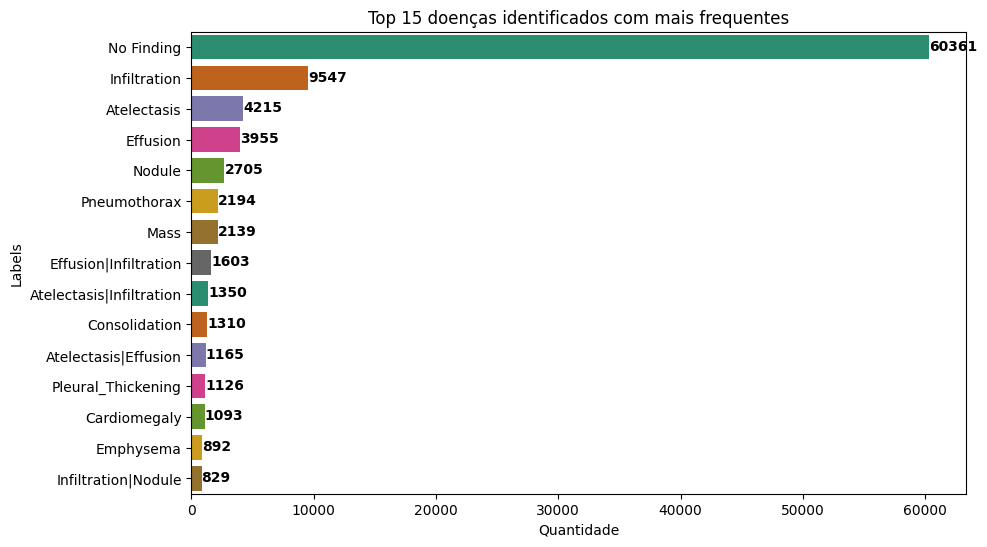

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

# Crie um gráfico de barras horizontais
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=all_xray_df['Finding Labels'].value_counts()[:15], y=all_xray_df['Finding Labels'].value_counts()[:15].index, palette='Dark2')

# Adicione os valores numéricos no topo de cada barra
for i, v in enumerate(all_xray_df['Finding Labels'].value_counts()[:15]):
    ax.text(v + 3, i + 0.1, str(v), color='black', fontweight='bold')

# Adicione rótulos e título
plt.xlabel('Quantidade')
plt.ylabel('Labels')
plt.title('Top 15 doenças identificados com mais frequentes')

# Exiba o gráfico
plt.show()

In [ ]:
all_xray_df['Finding Labels'] = all_xray_df['Finding Labels'].map(lambda x: x.replace('No Finding', ''))
from itertools import chain
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_labels = [x for x in all_labels if len(x)>0]
print('All Labels ({}): {}'.format(len(all_labels), all_labels))
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        all_xray_df[c_label] = all_xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
all_xray_df.sample(3)

All Labels (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
97779,00025800_008.png,Effusion,8,25800,30,F,PA,2594,2991,0.143,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21637,00005754_000.png,,0,5754,63,F,AP,2500,2048,0.168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51086,00012907_016.png,,14,12907,44,M,PA,2992,2991,0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_labels

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Effusion',
 'Emphysema',
 'Fibrosis',
 'Hernia',
 'Infiltration',
 'Mass',
 'Nodule',
 'Pleural_Thickening',
 'Pneumonia',
 'Pneumothorax']

In [ ]:
# keep at least 1000 cases
MIN_CASES = 1000
all_labels = [c_label for c_label in all_labels if all_xray_df[c_label].sum()>MIN_CASES]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(all_xray_df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11559), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2303), ('Effusion', 13317), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19894), ('Mass', 5782), ('Nodule', 6331), ('Pleural_Thickening', 3385), ('Pneumonia', 1431), ('Pneumothorax', 5302)]


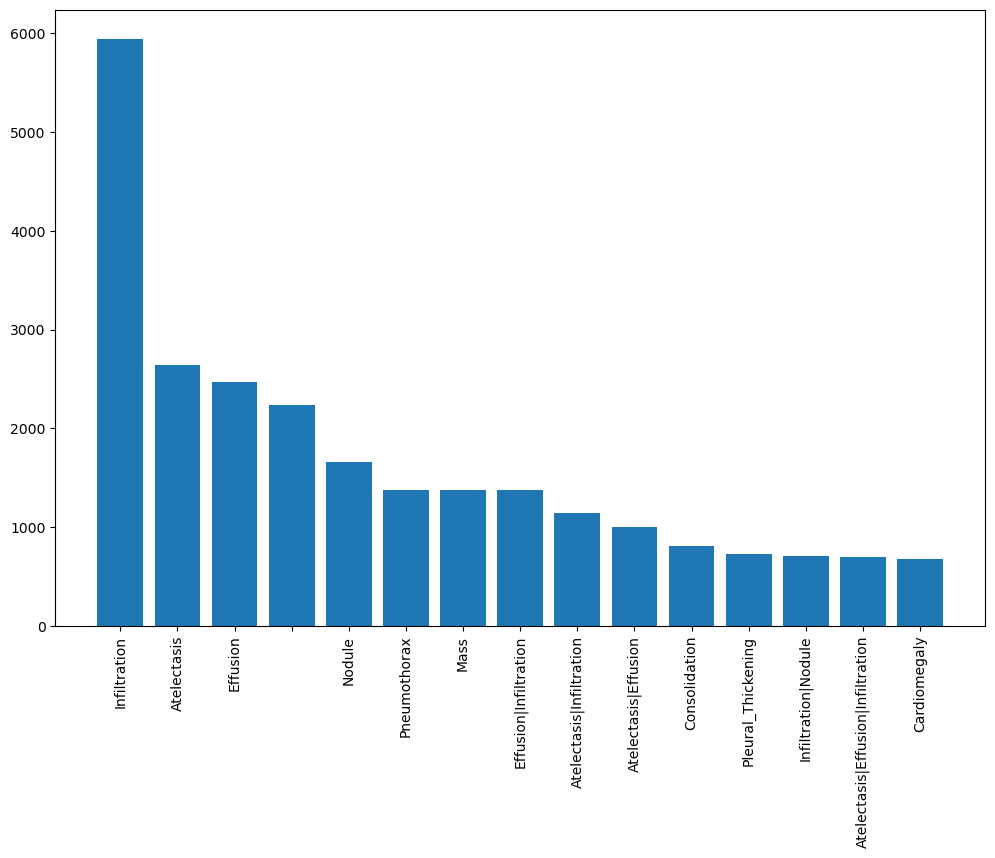

In [ ]:
# since the dataset is very unbiased, we can resample it to be a more reasonable collection
# weight is 0.1 + number of findings
sample_weights = all_xray_df['Finding Labels'].map(lambda x: len(x.split('|')) if len(x)>0 else 0).values + 4e-2
sample_weights /= sample_weights.sum()
all_xray_df = all_xray_df.sample(40000, weights=sample_weights)

label_counts = all_xray_df['Finding Labels'].value_counts()[:15]
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
_ = ax1.set_xticklabels(label_counts.index, rotation = 90)

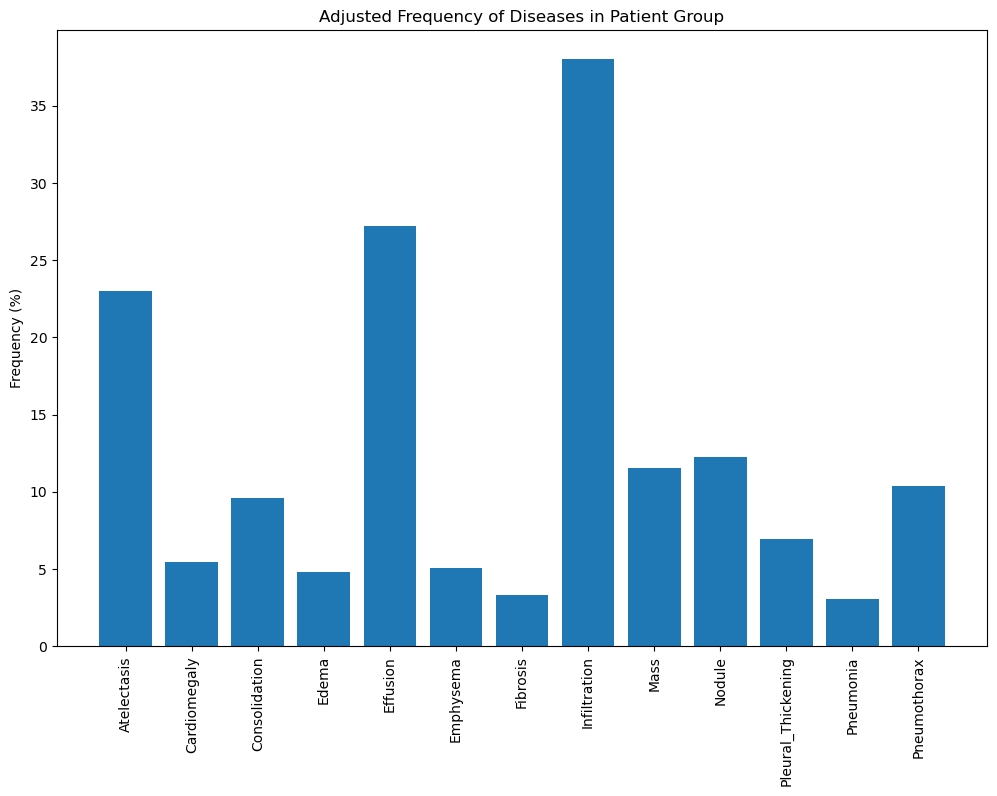

In [ ]:
label_counts = 100*np.mean(all_xray_df[all_labels].values,0)
fig, ax1 = plt.subplots(1,1,figsize = (12, 8))
ax1.bar(np.arange(len(label_counts))+0.5, label_counts)
ax1.set_xticks(np.arange(len(label_counts))+0.5)
ax1.set_xticklabels(all_labels, rotation = 90)
ax1.set_title('Adjusted Frequency of Diseases in Patient Group')
_ = ax1.set_ylabel('Frequency (%)')

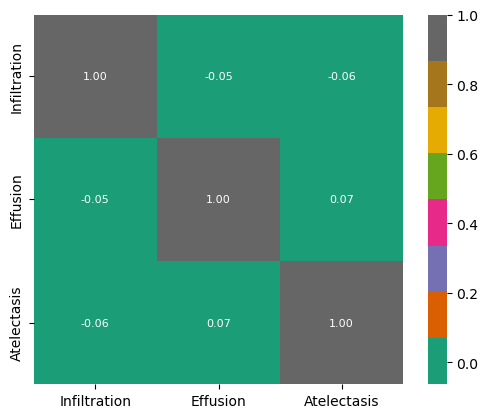

In [ ]:
cols = ['Infiltration','Effusion','Atelectasis']
corr_matx = all_xray_df[cols].corr()

heatmap = sns.heatmap(corr_matx,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 8},yticklabels=cols,xticklabels=cols,cmap='Dark2')

c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\andre\anaconda3\Lib\s

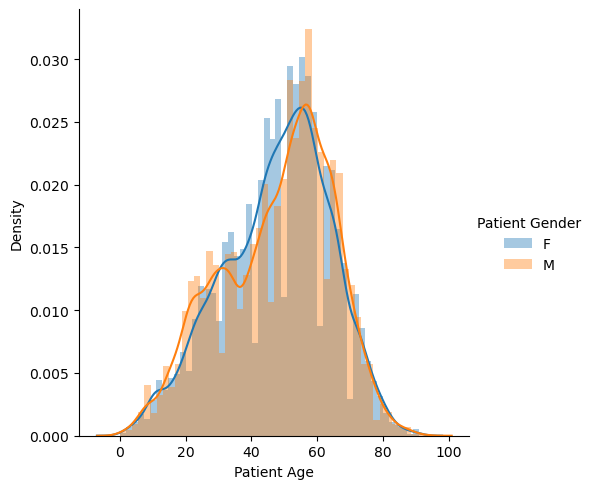

In [ ]:
sns.FacetGrid(all_xray_df,hue='Patient Gender',height=5).map(sns.distplot,'Patient Age').add_legend()
plt.show()

Infiltration
0.0    24802
1.0    15198
Name: count, dtype: int64


c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


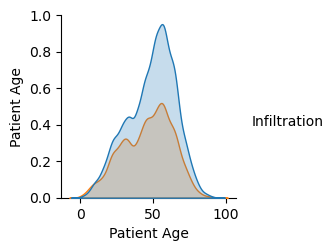

In [ ]:
positive_cases_infiltration = np.sum(all_xray_df['Infiltration'] == True) // 2
oversample_factor = 4

all_xray_df['Infiltration'] = all_xray_df['Infiltration']

more_balanced_df = all_xray_df.groupby(['Patient Gender', 'Infiltration']).apply(lambda x: x.sample(min(oversample_factor*positive_cases_infiltration, x.shape[0]),
                                                                                                   replace=False)
                                                                                  ).reset_index(drop=True)

print(more_balanced_df['Infiltration'].value_counts())
sns.pairplot(more_balanced_df[['Patient Age', 'Infiltration']], hue='Infiltration')


Effusion
0.0    29123
1.0    10877
Name: count, dtype: int64


c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


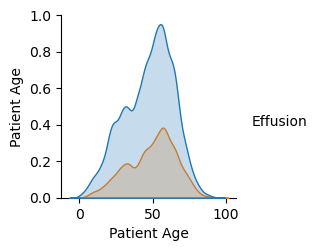

In [ ]:
positive_cases_effusion = np.sum(all_xray_df['Effusion'] == True) // 2
oversample_factor = 4

all_xray_df['Effusion'] = all_xray_df['Effusion']

more_balanced_df = all_xray_df.groupby(['Patient Gender', 'Effusion']).apply(lambda x: x.sample(min(oversample_factor*positive_cases_effusion, x.shape[0]),
                                                                                                   replace=False)
                                                                                  ).reset_index(drop=True)

print(more_balanced_df['Effusion'].value_counts())
sns.pairplot(more_balanced_df[['Patient Age', 'Effusion']], hue='Effusion')


Atelectasis
0.0    30811
1.0     9189
Name: count, dtype: int64


c:\Users\andre\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


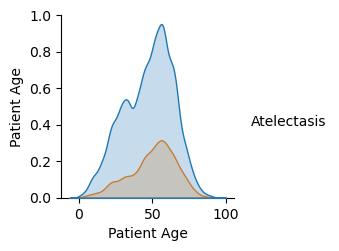

In [ ]:
positive_cases_atelectasis = np.sum(all_xray_df['Atelectasis'] == True) // 2
oversample_factor = 4

all_xray_df['Atelectasis'] = all_xray_df['Atelectasis']

more_balanced_df = all_xray_df.groupby(['Patient Gender', 'Atelectasis']).apply(lambda x: x.sample(min(oversample_factor*positive_cases_atelectasis, x.shape[0]),
                                                                                                   replace=False)
                                                                                  ).reset_index(drop=True)

print(more_balanced_df['Atelectasis'].value_counts())
sns.pairplot(more_balanced_df[['Patient Age', 'Atelectasis']], hue='Atelectasis')


# Preparação Training Data - Só com 'Infiltration', 'Effusion', 'Atelectasis'

In [ ]:
selected_diseases = ['Infiltration', 'Effusion', 'Atelectasis']

all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: x[selected_diseases].values.tolist(), axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [ ]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [ ]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = selected_diseases,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = selected_diseases,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

train_X, train_Y = next(core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = selected_diseases,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = selected_diseases,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 20050 validated image filenames belonging to 3 classes.
Found 6739 validated image filenames belonging to 3 classes.
Found 20050 validated image filenames belonging to 3 classes.
Found 6739 validated image filenames belonging to 3 classes.


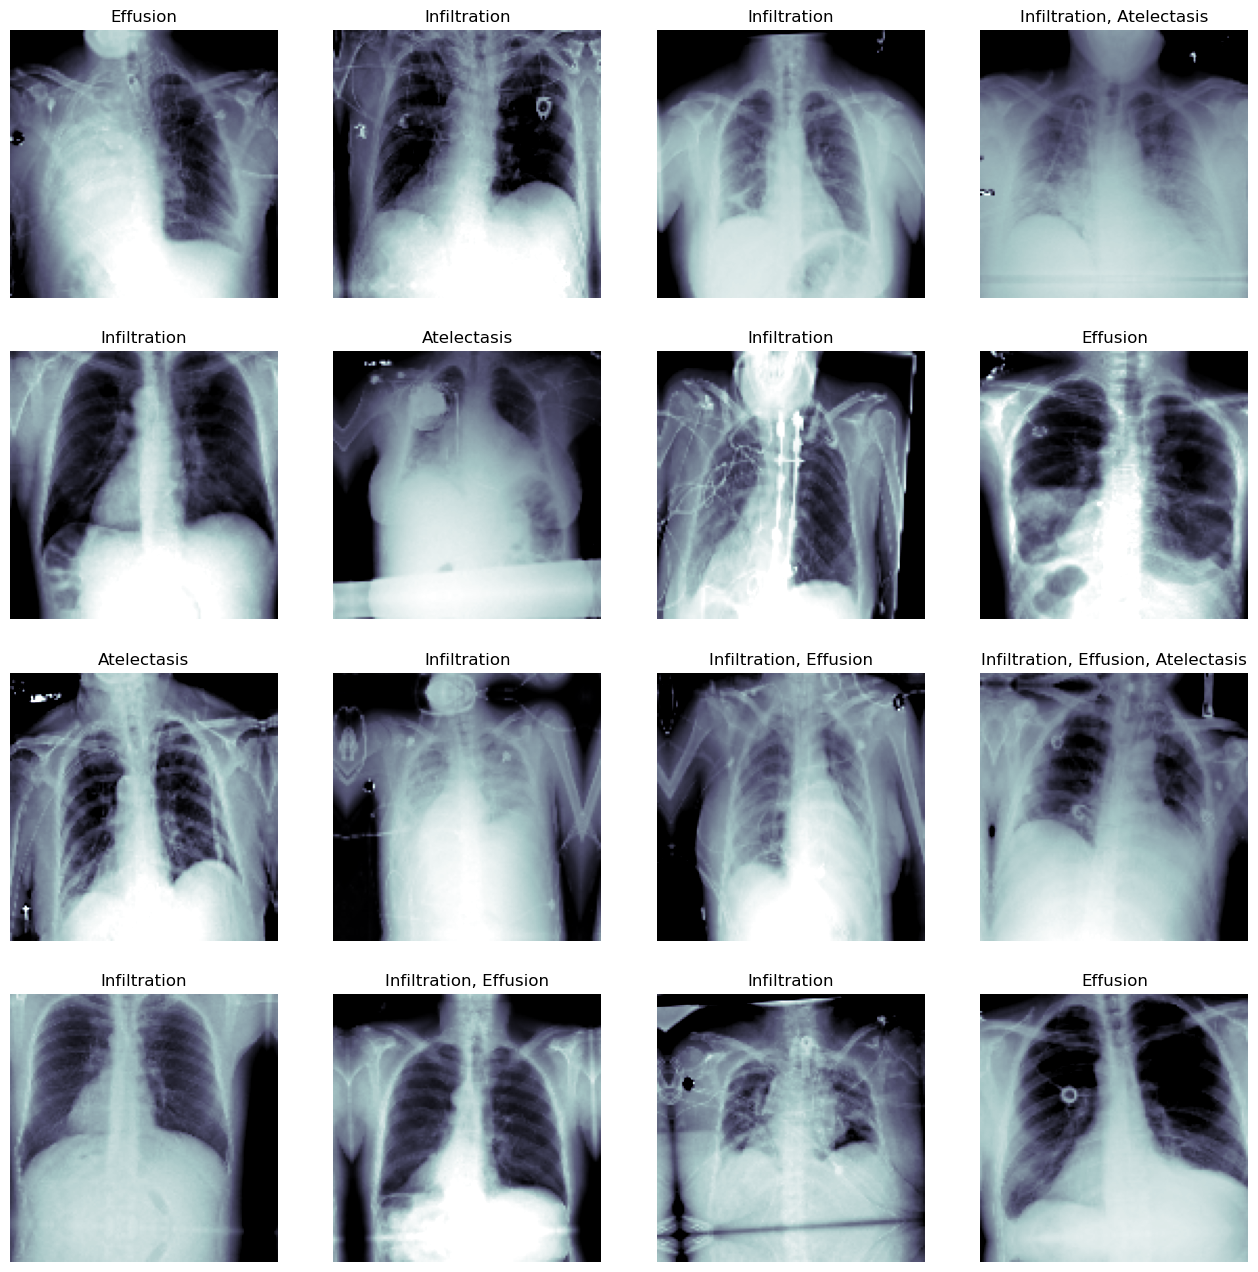

In [ ]:
t_x, t_y = next(train_gen)
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(selected_diseases, c_y)
                             if n_score>0.5]))
    c_ax.axis('off')

In [ ]:
from keras.applications.mobilenet import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_mobilenet_model = MobileNet(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_mobilenet_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(selected_diseases), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
multi_disease_model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228288   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
 9 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_41 (Dropout)        (None, 1024)              0         
                                                                 
 dense_41 (Dense)            (None, 512)               524800    
                                                                 
 dropout_42 (Dropout)        (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 3)               

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=20)
callbacks_list = [checkpoint, early]

In [ ]:
historico=multi_disease_model.fit_generator(train_gen,
                                  steps_per_epoch=10,
                                  validation_data = (test_X, test_Y),
                                  epochs = 20,
                                  callbacks = callbacks_list)


C:\Users\andre\AppData\Local\Temp\ipykernel_5476\3425744050.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historico=multi_disease_model.fit_generator(train_gen,


Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0561 - binary_accuracy: 0.5510
Epoch 1: val_loss improved from inf to 0.69460, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 18s 1s/step - loss: 1.0561 - binary_accuracy: 0.5510 - val_loss: 0.6946 - val_binary_accuracy: 0.4339
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.9579 - binary_accuracy: 0.5667
Epoch 2: val_loss improved from 0.69460 to 0.69238, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 10s 1s/step - loss: 0.9579 - binary_accuracy: 0.5667 - val_loss: 0.6924 - val_binary_accuracy: 0.5101
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.9375 - binary_accuracy: 0.5542
Epoch 3: val_loss improved from 0.69238 to 0.67087, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 11s 1s/step - loss: 0.9375 - binary_accuracy: 0.5542 - val_loss: 0.6709 - val_binar

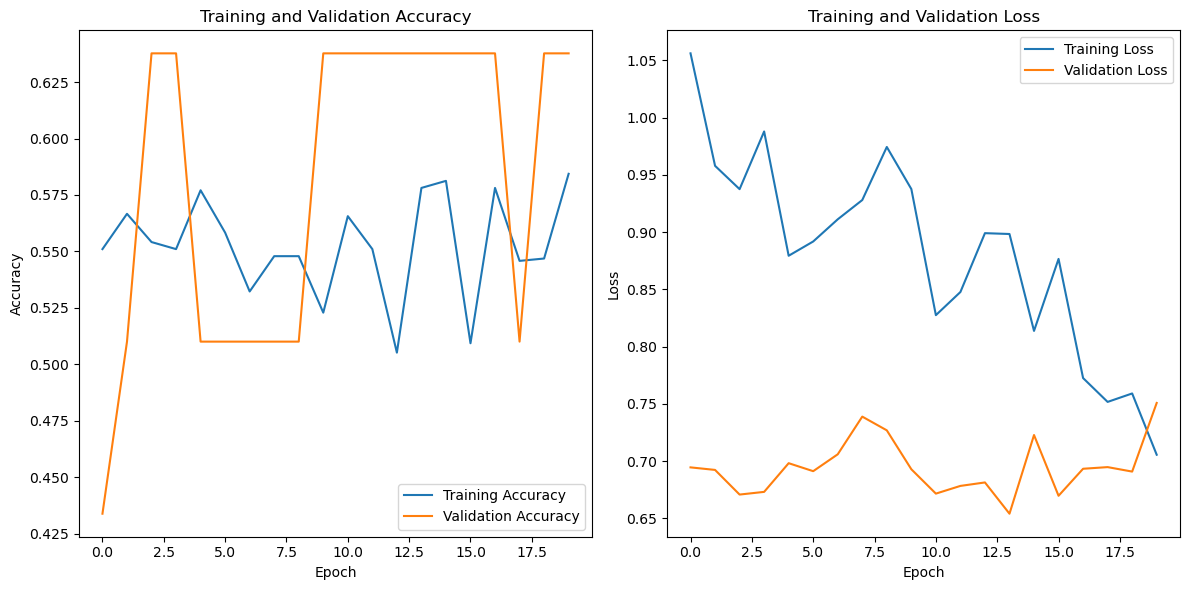

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(historico.history['binary_accuracy'], label='Training Accuracy')
plt.plot(historico.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Training Loss')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Predict só com as 3 Doenças ('Infiltration', 'Effusion', 'Atelectasis')

In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 4s 110ms/step


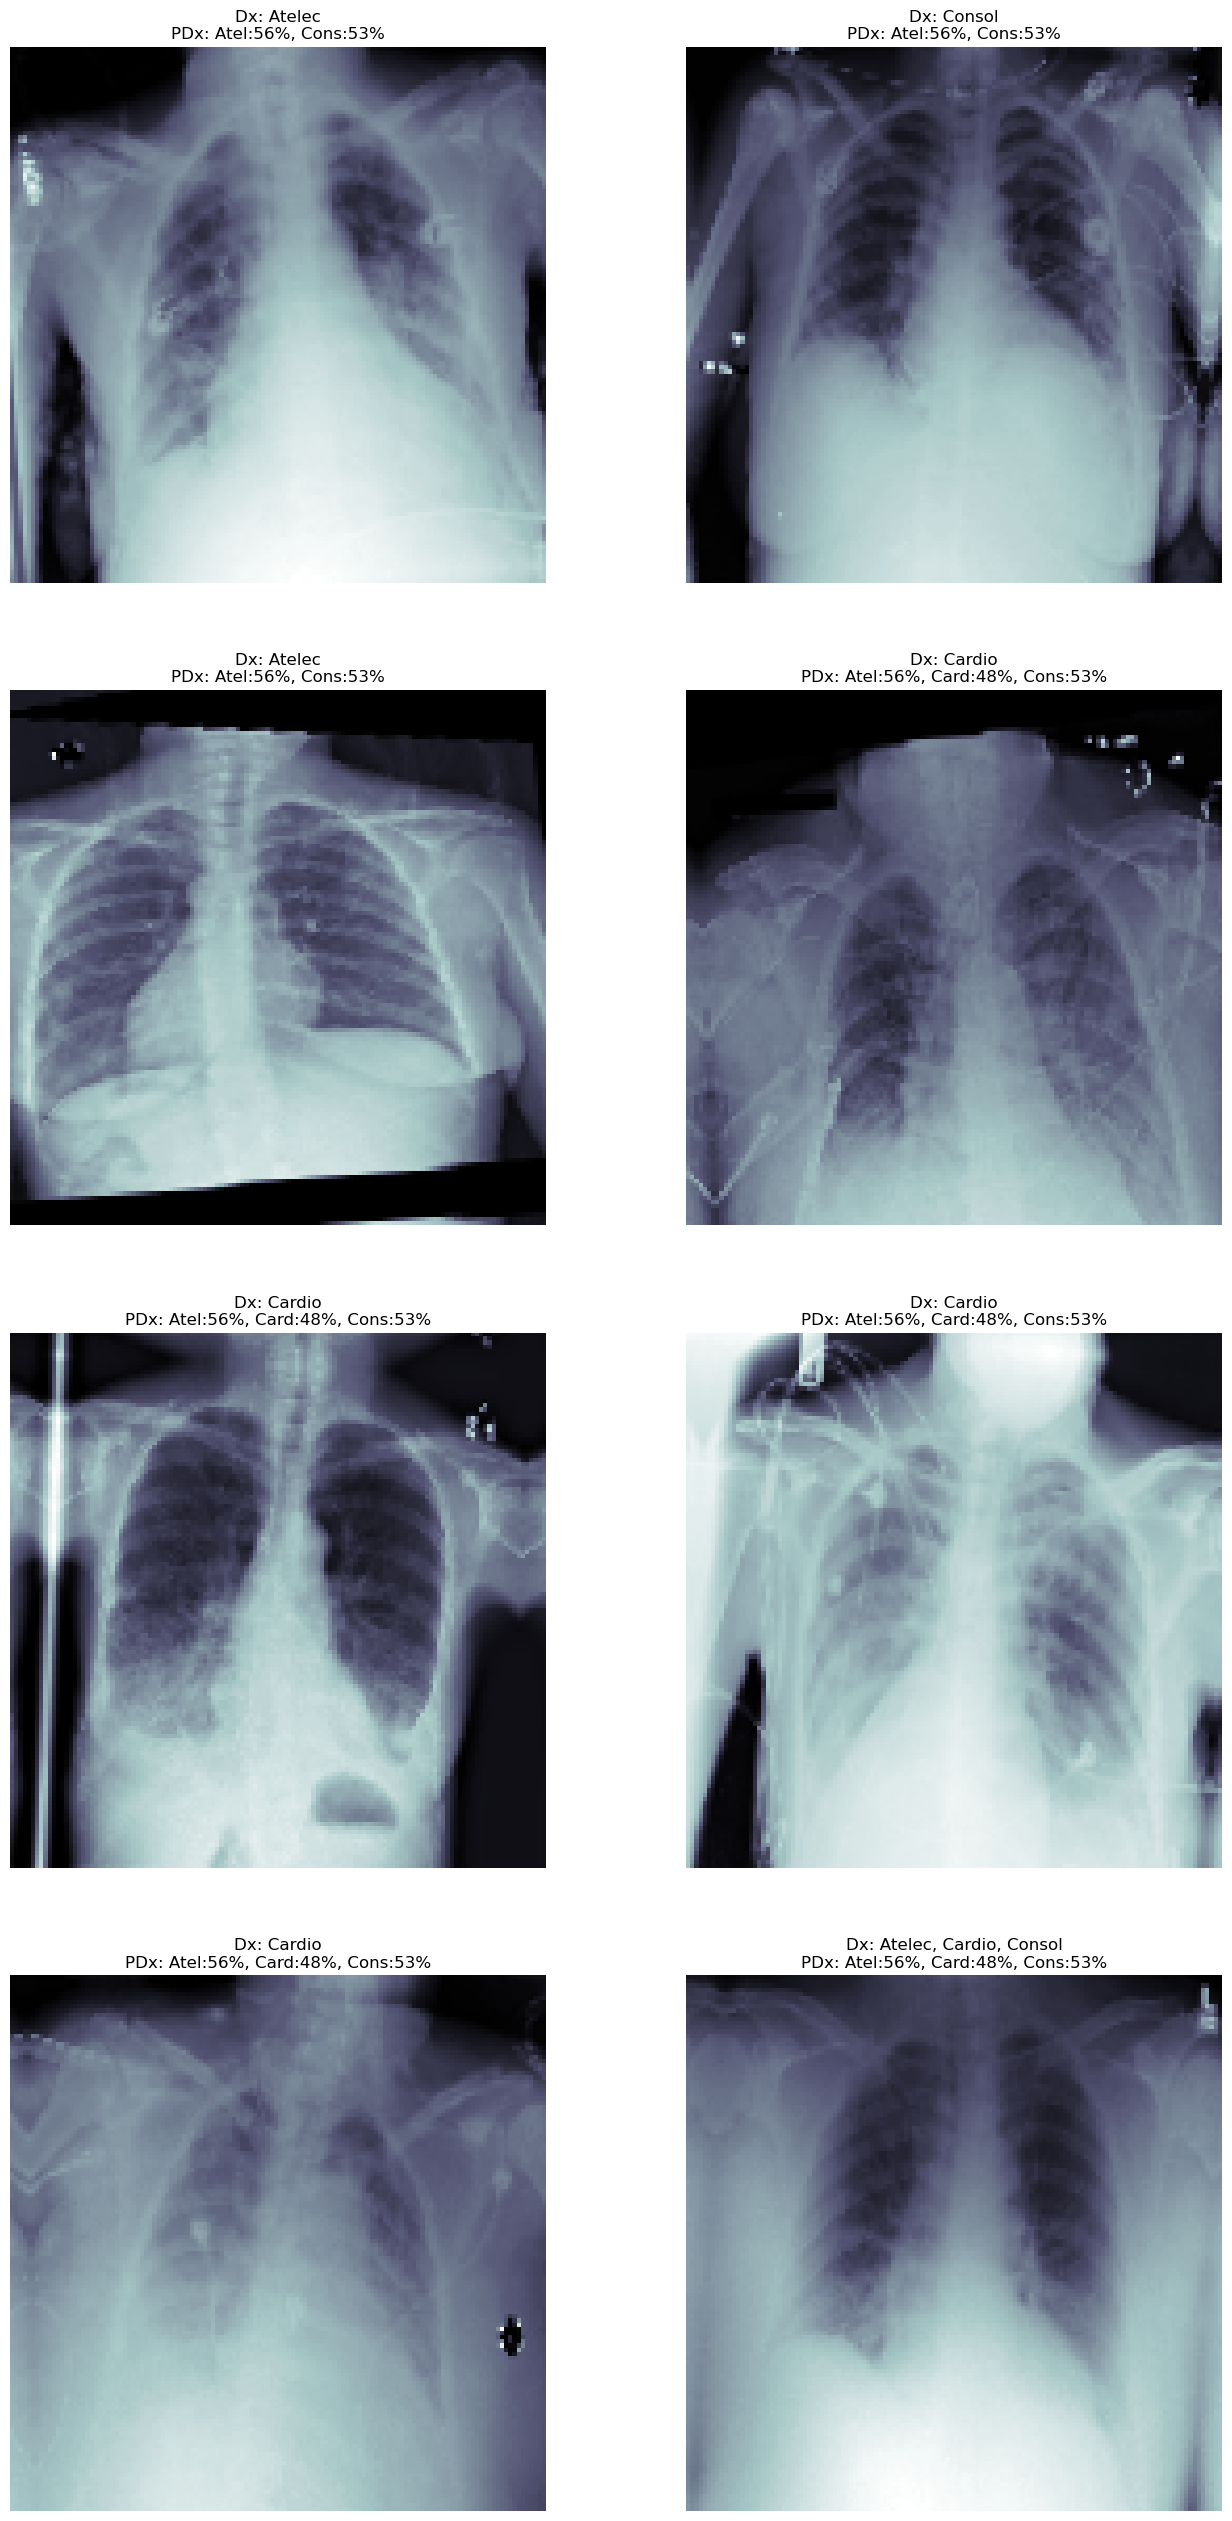

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels,
                                                                  test_Y[idx])
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels,
                                                                  test_Y[idx], pred_Y[idx])
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')

# Preparação Training Data - Todas as Doenças

In [ ]:

all_xray_df['disease_vec'] = all_xray_df.apply(lambda x: x[all_labels].values.tolist(), axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_xray_df,
                                   test_size = 0.25,
                                   random_state = 2018,
                                   stratify = all_xray_df['Finding Labels'].map(lambda x: x[:4]))
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 30000 validation 10000


In [ ]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (128, 128)
core_idg = ImageDataGenerator(samplewise_center=True,
                              samplewise_std_normalization=True,
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.05,
                              width_shift_range=0.1,
                              rotation_range=5,
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [ ]:
train_gen = core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 32)

valid_gen = core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 256) # we can use much larger batches for evaluation

train_X, train_Y = next(core_idg.flow_from_dataframe(dataframe=train_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

test_X, test_Y = next(core_idg.flow_from_dataframe(dataframe=valid_df,
                             directory=None,
                             x_col = 'path',
                            y_col = 'newLabel',
                             class_mode = 'categorical',
                            classes = all_labels,
                            target_size = IMG_SIZE,
                             color_mode = 'grayscale',
                            batch_size = 1024))

Found 28267 validated image filenames belonging to 13 classes.
Found 9420 validated image filenames belonging to 13 classes.
Found 28267 validated image filenames belonging to 13 classes.
Found 9420 validated image filenames belonging to 13 classes.


In [ ]:
from keras.applications.vgg19 import VGG19
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
base_model = VGG19(input_shape =  t_x.shape[1:],
                                 include_top = False, weights = None)
multi_disease_model = Sequential()
multi_disease_model.add(base_model)
multi_disease_model.add(GlobalAveragePooling2D())
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(512))
multi_disease_model.add(Dropout(0.5))
multi_disease_model.add(Dense(len(all_labels), activation = 'sigmoid'))
multi_disease_model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy'])
multi_disease_model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20023232  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 8 (GlobalAveragePooling2D)                                      
                                                                 
 dropout_39 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 512)               262656    
                                                                 
 dropout_40 (Dropout)        (None, 512)               0         
                                                                 
 dense_40 (Dense)            (None, 13)                6669      
                                                     

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('xray_class')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=20)
callbacks_list = [checkpoint, early]

In [ ]:
historico=multi_disease_model.fit_generator(train_gen,
                                  steps_per_epoch=10,
                                  validation_data = (test_X, test_Y),
                                  epochs = 20,
                                  callbacks = callbacks_list)


C:\Users\andre\AppData\Local\Temp\ipykernel_5476\3425744050.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historico=multi_disease_model.fit_generator(train_gen,


Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.5846 - binary_accuracy: 0.7810
Epoch 1: val_loss improved from inf to 0.63594, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 104s 11s/step - loss: 1.5846 - binary_accuracy: 0.7810 - val_loss: 0.6359 - val_binary_accuracy: 0.7830
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.4908 - binary_accuracy: 0.7954
Epoch 2: val_loss improved from 0.63594 to 0.35956, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 101s 11s/step - loss: 0.4908 - binary_accuracy: 0.7954 - val_loss: 0.3596 - val_binary_accuracy: 0.8676
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.3764 - binary_accuracy: 0.8572
Epoch 3: val_loss improved from 0.35956 to 0.34977, saving model to xray_class_weights.best.hdf5
10/10 [==============================] - 102s 11s/step - loss: 0.3764 - binary_accuracy: 0.8572 - val_loss: 0.3498 - val

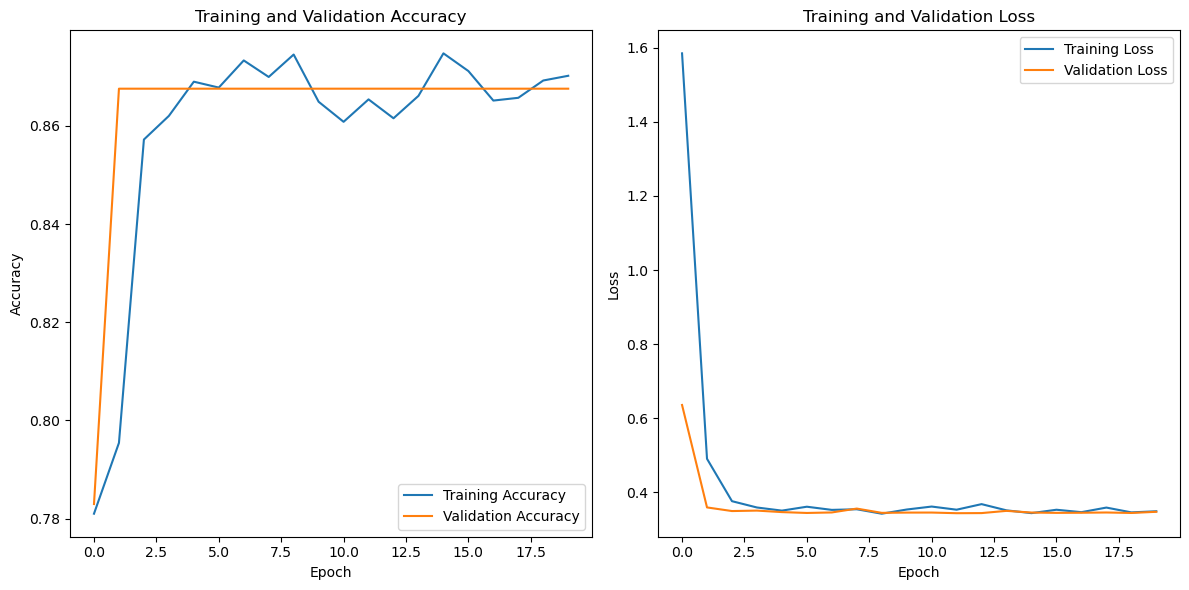

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(historico.history['binary_accuracy'], label='Training Accuracy')
plt.plot(historico.history['val_binary_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historico.history['loss'], label='Training Loss')
plt.plot(historico.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Predict com as todas as doenças


In [ ]:
pred_Y = multi_disease_model.predict(test_X, batch_size = 32, verbose = True)

32/32 [==============================] - 48s 1s/step


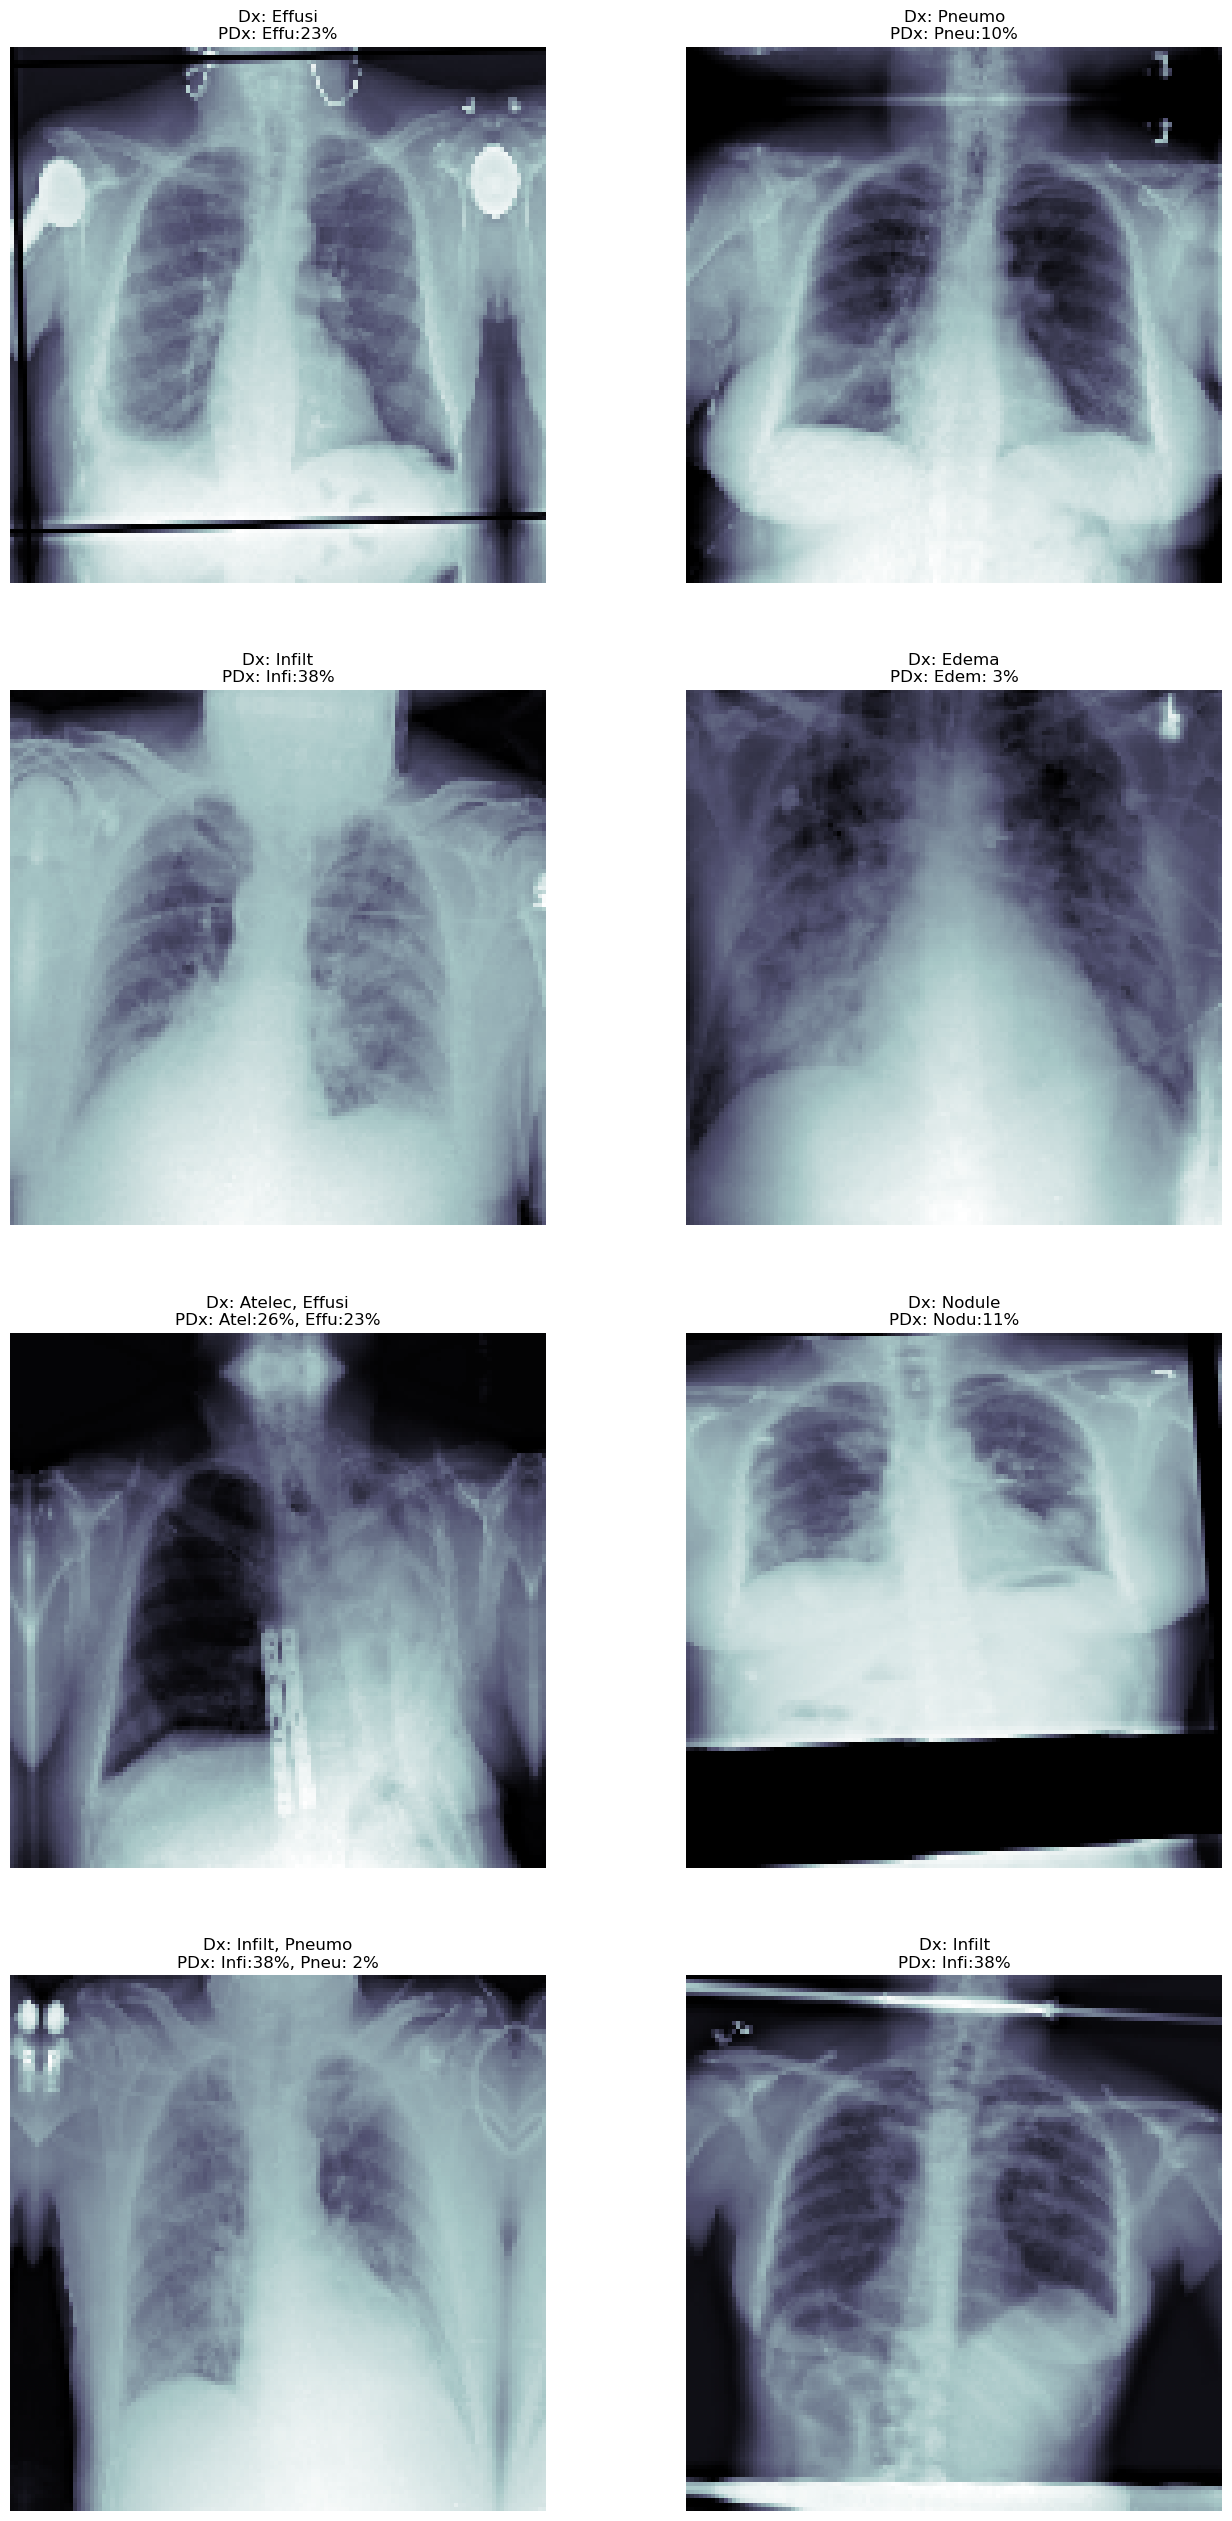

In [ ]:
sickest_idx = np.argsort(np.sum(test_Y, 1)<1)
fig, m_axs = plt.subplots(4, 2, figsize = (16, 32))
for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    c_ax.imshow(test_X[idx, :,:,0], cmap = 'bone')
    stat_str = [n_class[:6] for n_class, n_score in zip(all_labels,
                                                                  test_Y[idx])
                             if n_score>0.5]
    pred_str = ['%s:%2.0f%%' % (n_class[:4], p_score*100)  for n_class, n_score, p_score in zip(all_labels,
                                                                  test_Y[idx], pred_Y[idx])
                             if (n_score>0.5) or (p_score>0.5)]
    c_ax.set_title('Dx: '+', '.join(stat_str)+'\nPDx: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')